10 1045.016619564694
20 902.0105054106475
30 791.5991592743881
40 715.8907970418671
50 641.4234589732267
60 598.5363369873555
70 568.3126662324702
80 548.244200105851
90 537.3474585270941
100 517.4996984167792
110 500.2614830198281
120 488.9532974359995
130 487.4455618768882
140 487.4455618768882
150 487.4455618768882
160 487.4455618768882
170 487.4455618768882
180 487.4455618768882
190 487.4455618768882
200 487.4455618768882

----------------------------------------------------------------
Generation: 200
Fittest chromosome distance before training: 1299.9828687953304
Fittest chromosome distance after training: 487.4455618768882
Target distance: 450.0
----------------------------------------------------------------



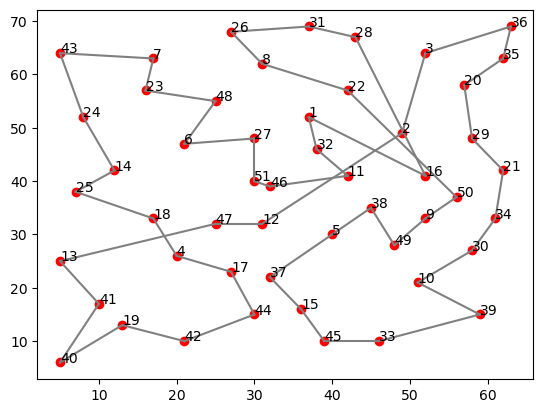

In [2]:
# Mahdi Hassanzadeh

import random
import math
import matplotlib.pyplot as plt


# get cities info
def getCity():
    cities = []
    f = open("TSP51.txt")
    for i in f.readlines():
        node_city_val = i.split()
        cities.append(
            [node_city_val[0], float(node_city_val[1]), float(node_city_val[2])]
        )

    return cities


# calculating distance of the cities
def calcDistance(cities):
    total_sum = 0
    for i in range(len(cities) - 1):
        cityA = cities[i]
        cityB = cities[i + 1]

        d = math.sqrt(
            math.pow(cityB[1] - cityA[1], 2) + math.pow(cityB[2] - cityA[2], 2)
        )

        total_sum += d

    cityA = cities[0]
    cityB = cities[-1]
    d = math.sqrt(math.pow(cityB[1] - cityA[1], 2) + math.pow(cityB[2] - cityA[2], 2))

    total_sum += d

    return total_sum


# selecting the population
def selectPopulation(cities, size):
    population = []

    for i in range(size):
        c = cities.copy()
        random.shuffle(c)
        distance = calcDistance(c)
        population.append([distance, c])
    fitest = sorted(population)[0]

    return population, fitest


# the genetic algorithm
def geneticAlgorithm(
    population,
    lenCities,
    TOURNAMENT_SELECTION_SIZE,
    MUTATION_RATE,
    CROSSOVER_RATE,
    TARGET,
):
    gen_number = 0
    for i in range(200):
        new_population = []

        # selecting two of the best options we have (elitism)
        new_population.append(sorted(population)[0])
        new_population.append(sorted(population)[1])

        for i in range(int((len(population) - 2) / 2)):
            # CROSSOVER
            random_number = random.random()
            if random_number < CROSSOVER_RATE:
                parent_chromosome1 = sorted(
                    random.choices(population, k=TOURNAMENT_SELECTION_SIZE)
                )[0]

                parent_chromosome2 = sorted(
                    random.choices(population, k=TOURNAMENT_SELECTION_SIZE)
                )[0]

                point = random.randint(0, lenCities - 1)

                child_chromosome1 = parent_chromosome1[1][0:point]
                for j in parent_chromosome2[1]:
                    if (j in child_chromosome1) == False:
                        child_chromosome1.append(j)

                child_chromosome2 = parent_chromosome2[1][0:point]
                for j in parent_chromosome1[1]:
                    if (j in child_chromosome2) == False:
                        child_chromosome2.append(j)

            # If crossover not happen
            else:
                child_chromosome1 = random.choices(population)[0][1]
                child_chromosome2 = random.choices(population)[0][1]

            # MUTATION
            if random.random() < MUTATION_RATE:
                point1 = random.randint(0, lenCities - 1)
                point2 = random.randint(0, lenCities - 1)
                child_chromosome1[point1], child_chromosome1[point2] = (
                    child_chromosome1[point2],
                    child_chromosome1[point1],
                )

                point1 = random.randint(0, lenCities - 1)
                point2 = random.randint(0, lenCities - 1)
                child_chromosome2[point1], child_chromosome2[point2] = (
                    child_chromosome2[point2],
                    child_chromosome2[point1],
                )

            new_population.append([calcDistance(child_chromosome1), child_chromosome1])
            new_population.append([calcDistance(child_chromosome2), child_chromosome2])

        population = new_population

        gen_number += 1

        if gen_number % 10 == 0:
            print(gen_number, sorted(population)[0][0])

        if sorted(population)[0][0] < TARGET:
            break

    answer = sorted(population)[0]

    return answer, gen_number


# draw cities and answer map
def drawMap(city, answer):
    for j in city:
        plt.plot(j[1], j[2], "ro")
        plt.annotate(j[0], (j[1], j[2]))

    for i in range(len(answer[1])):
        try:
            first = answer[1][i]
            secend = answer[1][i + 1]

            plt.plot([first[1], secend[1]], [first[2], secend[2]], "gray")
        except:
            continue

    first = answer[1][0]
    secend = answer[1][-1]
    plt.plot([first[1], secend[1]], [first[2], secend[2]], "gray")

    plt.show()


def main():
    # initial values
    POPULATION_SIZE = 2000
    TOURNAMENT_SELECTION_SIZE = 4
    MUTATION_RATE = 0.1
    CROSSOVER_RATE = 0.9
    TARGET = 450.0

    cities = getCity()
    firstPopulation, firstFitest = selectPopulation(cities, POPULATION_SIZE)
    answer, genNumber = geneticAlgorithm(
        firstPopulation,
        len(cities),
        TOURNAMENT_SELECTION_SIZE,
        MUTATION_RATE,
        CROSSOVER_RATE,
        TARGET,
    )

    print("\n----------------------------------------------------------------")
    print("Generation: " + str(genNumber))
    print("Fittest chromosome distance before training: " + str(firstFitest[0]))
    print("Fittest chromosome distance after training: " + str(answer[0]))
    print("Target distance: " + str(TARGET))
    print("----------------------------------------------------------------\n")

    drawMap(cities, answer)


main()